In [1]:
import numpy as np
import skfuzzy as fuzz
import skfuzzy.control as ctrl


## Question 1: Lead time

For the primary application or service you work on, what is your lead time for changes (that is, how long does it take to go from code committed to code successfully running in production)?

1. More than six months
2. One to six months
3. One week to one month
4. One day to one week
5. Less than one day
6. Less than one hour

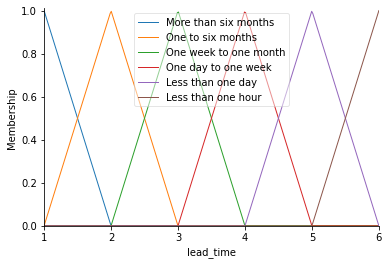

In [2]:
lead_time = ctrl.Antecedent(np.linspace(1, 6, 300), 'lead_time')
lead_time['More than six months'] = fuzz.trimf(lead_time.universe, [1, 1, 2])
lead_time['One to six months'] = fuzz.trimf(lead_time.universe, [1, 2, 3])
lead_time['One week to one month'] = fuzz.trimf(lead_time.universe, [2, 3, 4])
lead_time['One day to one week'] = fuzz.trimf(lead_time.universe, [3, 4, 5])
lead_time['Less than one day'] = fuzz.trimf(lead_time.universe, [4, 5, 6])
lead_time['Less than one hour'] = fuzz.trimf(lead_time.universe, [5, 6, 6])
lead_time.view()

## Question 2: Deploy frequency

For the primary application or service you work on, how often does your organization deploy code to production or release it to end users?

1. Fewer than once per six months
2. Between once per month and once every six months
3. Between once per week and once per month
4. Between once per day and once per week
5. Between once per hour and once per day
6. On demand (multiple deploys per day)

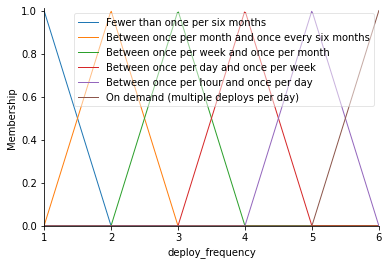

In [3]:
deploy_frequency = ctrl.Antecedent(np.linspace(1, 6, 300), 'deploy_frequency')
deploy_frequency.automf
deploy_frequency['Fewer than once per six months'] = fuzz.trimf(deploy_frequency.universe, [1, 1, 2])
deploy_frequency['Between once per month and once every six months'] = fuzz.trimf(deploy_frequency.universe, [1, 2, 3])
deploy_frequency['Between once per week and once per month'] = fuzz.trimf(deploy_frequency.universe, [2, 3, 4])
deploy_frequency['Between once per day and once per week'] = fuzz.trimf(deploy_frequency.universe, [3, 4, 5])
deploy_frequency['Between once per hour and once per day'] = fuzz.trimf(deploy_frequency.universe, [4, 5, 6])
deploy_frequency['On demand (multiple deploys per day)'] = fuzz.trimf(deploy_frequency.universe, [5, 6, 6])
deploy_frequency.view()

## Question 3: Time to restore

For the primary application or service you work on, how long does it generally take to restore service when a service incident or a defect that impacts users occurs (for example, unplanned outage, service impairment)?

1. More than six months
2. One to six months
3. One week to one month
4. One day to one week
5. Less than one day
6. Less than one hour

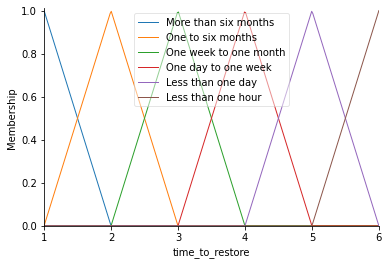

In [4]:
time_to_restore = ctrl.Antecedent(np.linspace(1, 6, 300), 'time_to_restore')
time_to_restore.automf
time_to_restore['More than six months'] = fuzz.trimf(time_to_restore.universe, [1, 1, 2])
time_to_restore['One to six months'] = fuzz.trimf(time_to_restore.universe, [1, 2, 3])
time_to_restore['One week to one month'] = fuzz.trimf(time_to_restore.universe, [2, 3, 4])
time_to_restore['One day to one week'] = fuzz.trimf(time_to_restore.universe, [3, 4, 5])
time_to_restore['Less than one day'] = fuzz.trimf(time_to_restore.universe, [4, 5, 6])
time_to_restore['Less than one hour'] = fuzz.trimf(time_to_restore.universe, [5, 6, 6])
time_to_restore.view()

## Question 4: Change fail percentage

For the primary application or service you work on, what percentage of changes to production or releases to users result in degraded service (for example, lead to service impairment or service outage) and subsequently require remediation (for example, require a hotfix, rollback, fix forward, patch)?

1. 0–15%
2. 16–30%
3. 31–45%
4. 46–60%
5. 61–75%
6. 76–100%

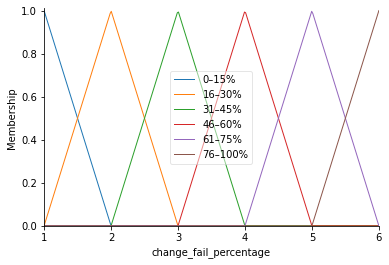

In [5]:
change_fail_percentage = ctrl.Antecedent(np.linspace(1, 6, 300), 'change_fail_percentage')
change_fail_percentage.automf
change_fail_percentage['0–15%'] = fuzz.trimf(change_fail_percentage.universe, [1, 1, 2])
change_fail_percentage['16–30%'] = fuzz.trimf(change_fail_percentage.universe, [1, 2, 3])
change_fail_percentage['31–45%'] = fuzz.trimf(change_fail_percentage.universe, [2, 3, 4])
change_fail_percentage['46–60%'] = fuzz.trimf(change_fail_percentage.universe, [3, 4, 5])
change_fail_percentage['61–75%'] = fuzz.trimf(change_fail_percentage.universe, [4, 5, 6])
change_fail_percentage['76–100%'] = fuzz.trimf(change_fail_percentage.universe, [5, 6, 6])
change_fail_percentage.view()

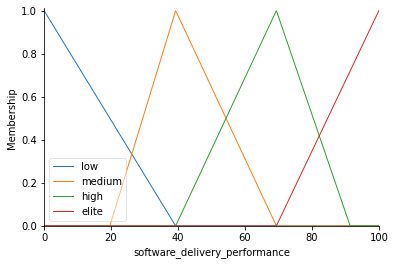

In [6]:
low = 107
medium = 157
high = 127
elite = 81
total = low + medium + high + elite
software_delivery_performance = ctrl.Consequent(np.linspace(0, 100, 500), 'software_delivery_performance')
software_delivery_performance['low'] = fuzz.trimf(software_delivery_performance.universe, [0, 0, (low + medium/2)/total*100])
software_delivery_performance['medium'] = fuzz.trimf(software_delivery_performance.universe, [(low + medium/2)/total*100/2, (low + medium/2)/total*100, (low + medium + high/2)/total*100])
software_delivery_performance['high'] = fuzz.trimf(software_delivery_performance.universe, [(low + medium/2)/total*100, (low + medium + high/2)/total*100, (low + medium + high + elite/2)/total*100])
software_delivery_performance['elite'] = fuzz.trimf(software_delivery_performance.universe, [(low + medium + high/2)/total*100, 100, 100])
software_delivery_performance.view()

In [7]:
rules = [
    ctrl.Rule(
        lead_time['More than six months'] |
        deploy_frequency['Fewer than once per six months'] |
        time_to_restore['More than six months'] |
        change_fail_percentage['76–100%'],
            software_delivery_performance['low']
    ),
    ctrl.Rule(
        lead_time['One to six months'] |
        lead_time['One week to one month'] |
        deploy_frequency['Between once per month and once every six months'] |
        deploy_frequency['Between once per week and once per month'] |
        time_to_restore['One to six months'] |
        time_to_restore['One week to one month'] |
        change_fail_percentage['46–60%'] |
        change_fail_percentage['61–75%'],
            software_delivery_performance['medium']
    ),
    ctrl.Rule(
        lead_time['One day to one week'] |
        lead_time['Less than one day'] |
        deploy_frequency['Between once per day and once per week'] |
        deploy_frequency['Between once per hour and once per day'] |
        time_to_restore['One day to one week'] |
        time_to_restore['Less than one day'] |
        change_fail_percentage['16–30%'] |
        change_fail_percentage['31–45%'],
            software_delivery_performance['high']
    ),
    ctrl.Rule(
        lead_time['Less than one hour'] |
        deploy_frequency['On demand (multiple deploys per day)'] |
        time_to_restore['Less than one hour'] |
        change_fail_percentage['0–15%'],
            software_delivery_performance['elite']
    ),
]

46.7%


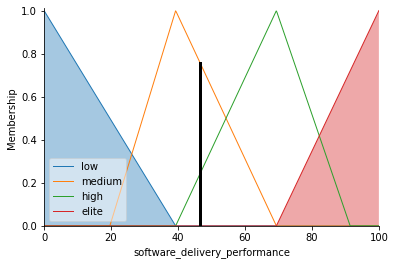

In [8]:
dora_ctrl = ctrl.ControlSystem(rules)
dora = ctrl.ControlSystemSimulation(dora_ctrl)

dora.input['lead_time'] = 1
dora.input['deploy_frequency'] = 6
dora.input['time_to_restore'] = 6
dora.input['change_fail_percentage'] = 6

dora.compute()
print(f"{np.around(dora.output['software_delivery_performance'], 1)}%")
software_delivery_performance.view(sim=dora)